
    
  # DSP: Underlying Concepts

    
## William Eustace M0WJE
## m0@wje.io
    


# What is a signal?

* For our purposes: a time-varying function $f(t)$.
* Analogue or digital?
* Discrete or continuous?




# Essential Concepts


* A **sum**: \begin{equation} \sum_{n=0}^{M} f(nT)\end{equation}
    
* An **integral**: \begin{equation} \int_{-\pi}^{\pi} f(t) dt \end{equation} 

* A **sum** which (**under some conditions**) _converges_ to an **integral**<sup>1</sup>: \begin{equation} \lim_{\delta T \to 0}( \sum_{n} f(n \delta T) \delta T ) = \int f(t) dt \end{equation} 

    
    
 

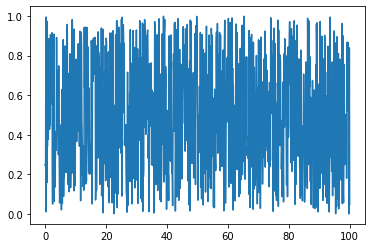

In [1]:

import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
t = np.linspace(0,100,1000)
s = np.random.random(1000)
plt.plot(t,s)

 
<sup>1</sup>This is a Riemann integral. Thankfully this is all most of us will ever need...

# Waterfalls & Hotplates
* Probably all have heard of the Fourier Transform and seen a waterfall display like this; do you know why it works? 

* waterfall pic

* hotplate pic & fourier explanation

* A common goal in computing the Fourier **transform** is to determine how much energy/signal there is at a given frequency. We will fudge our way into this by starting from the basics...




# Towards Fourier Space
* Ways of approximating a function: Taylor Series
\begin{equation}f(t) \approx a_0 + a_1 x + a_2 x^2 + a_3 x^3 + ... \rm{for\ some\ }a_i\end{equation} 

* animation to illustrate Taylor series

* But what if we want to represent a **periodic** function? We might try <sup>1</sup> 

$$ f(t) \approx c + a_1 sin(t) + b_1 cos(t) + a_2 sin(2t) + b_2 cos(2t) + ... $$ 

<sup>1</sup> Advanced students should explain to their neighbours in the next break why we need both sine and cosine terms here.

This is a _Fourier Series_. How do we find $a_i$ and $b_i$? __Orthogonality of sines__

\begin{equation}\int_{-\pi}^\pi sin(m x) sin(n x) dx = \begin{cases} 
\pi & \forall m=n : m \in \mathbb{Z}\\
0 & \text{otherwise}
\end{cases}\end{equation}
(and the same is true for cos)
\begin{equation}\int_{-\pi}^\pi sin(m x) cos(n x) dx = 0 \ \forall  m,n \in \mathbb{Z} \end{equation}

In [9]:
import mpld3 
mpld3.enable_notebook()
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rcParams['figure.figsize']=[7,7]
import numpy as np
fig,ax=plt.subplots(1,2)
# ax.plot([0,10],[1,1])
# fig.set_size_inches((0.1,0.1),forward=True)
def update_m_value(m):
#     m = m_slider.val
    
    plt.cla()
    plt.plot(x,y_1,color='red')
    plt.plot([-100,100],[0,0],color='black')
    y_2 = np.sin(m*x)
    plt.plot(x,y_2,color='blue')
    plt.fill_between(x,y_1,y_2,color='grey')
    plt.xlim(-np.pi,np.pi)

    plt.yticks([-1,0,1])
    plt.xticks([-np.pi,0,np.pi],labels=["-π",0,"π"])
    #plt.title('$sin(x)sin(kx)$',fontsize=30)
    
    mpld3.display(fig,closefig=True)
    
m = 2

# fig,ax = plt.subplots(1,1)
x = np.linspace(-np.pi,np.pi,500)
y_1 = np.sin(x)

update_m_value(5)

#add slider for m

    
interact(update_m_value,m=(1,10,1))
# mpld3.display(fig)
print()


interactive(children=(IntSlider(value=5, description='m', max=10, min=1), Output()), _dom_classes=('widget-int…

* Why does this help us?

\begin{equation} a_n = \frac{1}{\pi} \int_{-\pi}^\pi f(t) sin(n t) dt \end{equation}

(plus a DC offset...)

\begin{equation} c = \int_{-\pi}^{\pi} f(t) dt \end{equation}



In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(j):
    print(j)
    return j

j = True
interact(f,j=True)

interactive(children=(Checkbox(value=True, description='j'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(j)>